## Projeto Predição de Insuficiência Cardiaca

<img src="http://www.bancodasaude.com/cdn/infosaude/article/insuficiencia-cardiaca.jpg" alt="drawing" width="600"/>

Olá, meu nome é Patrick Piccini, e seja bem vindo a mais um projeto de Data Science.

O que iremos ver nesse Notebook:
- 📚 DataSet
- 🧠 Compreendendo o problema
- ⛏ Analise Exploratoria de Dados
- 🎲 Manipulação de dados
- 📊 Visualização de dados
- 😱 Insigths

# DataSet
[Heart Failure Prediction Dataset - Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)


# Compreendendo o problema
As doenças cardiovasculares (DCVs) são a causa número 1 de morte em todo o mundo, levando cerca de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes em todo o mundo. Quatro das mortes por 5CVD são devido a ataques cardíacos e derrames, e um terço dessas mortes ocorre prematuramente em pessoas com menos de 70 anos de idade. A insuficiência cardíaca é um evento comum causado por DCV e este conjunto de dados contém 11 características que podem ser usadas para prever uma possível doença cardíaca.

Pessoas com doença cardiovascular ou com alto risco cardiovascular (devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia ou doença já estabelecida) precisam de detecção e gerenciamento precoces, onde um modelo de aprendizado de máquina pode ser de grande ajuda.

<img src="https://lh3.googleusercontent.com/LkeF783CO8iu1R8Q3fB-Kqo9L2x6FWcEYa-5NijcXqgNjaD3gCuixMwzW9ciVlikGNrdI1c1_uemz7xCeqV7I8DCKjl9ZmcKXt3ql9A4Bd-DmIfKZbDFp-yI8O0uvlorXYSbrkuL=s0" alt="drawing" width="700"/>

### Informações de atributo
- **Age:** idade do paciente [anos]
- **Sex:** sexo do paciente [M: Masculino, F: Feminino]
- **ChestPainType:** tipo de dor no peito [TA: Angina Típica, ATA: Angina Atípica, NAP: Dor Não Anginosa, ASY: Assintomática]
- **RestingBP:** pressão arterial de repouso [mm Hg]
- **Cholesterol:** colesterol sérico [mm/dl]
- **FastingBS:** glicemia em jejum [1: se FastingBS > 120 mg/dl, 0: caso contrário]
- **RestingECG:** resultados do eletrocardiograma de repouso [Normal: normal, ST: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do ST > 0,05 mV), HVE: mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes]
- **MaxHR:** frequência cardíaca máxima alcançada [Valor numérico entre 60 e 202]
- **ExerciseAngina: angina induzida por exercício [S: Sim, N: Não]
- **Oldpeak:** pico antigo = ST [Valor numérico medido em depressão]
- **ST_Slope:** inclinação do segmento ST do exercício de pico [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease:** classe de saída [1: doença cardíaca, 0: normal]

## Configuração Inicial

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, precision_recall_fscore_support

heart_df = pd.read_csv('./dataset/heart.csv', sep=',')


- Iremos renomear o nome das colunas para Portugues, onde facilitará na hora do entendimento da informação dos dados.

In [ ]:
columns = {
    'Age': 'Idade',
    'Sex': 'Sexo', 
    'ChestPainType': 'Tipo_Dor_Peito', 
    'RestingBP': 'RepousoPA', 
    'Cholesterol': 'Colesterol', 
    'FastingBS': 'FastingBS',
    'RestingECG': 'RestingECG', 
    'MaxHR': 'Frequencia_Cardiaca_Max', 
    'ExerciseAngina': 'Exercicio_Angina', 
    'Oldpeak': 'Pico_Antigo', 
    'ST_Slope': 'ST_Slope',
    'HeartDisease': 'Doenca_Cardiaca'
}

heart_df = heart_df.rename(columns=columns)
heart_df.head(5)

# Exploração

- Verificaremos a quantidade de colunas e linhas existentes no DataSet.

In [ ]:
print('Colunas: %s' % heart_df.shape[1])
print('Linhas: %s' % heart_df.shape[0])

Com o comando **"describe"**, iremos obter um resumo de estatisticas descritivas do DataFrame. Isso inclui média, contagem, desvio padrão, percentis e valores mín.-máx. de todos os recursos.
com o **".T"** apenas iremos rotacionar o resultado do **"describe"**.

In [ ]:
heart_df.describe().T

Abaixo veremos mais algumas informações referente a cada coluna do DataFrame

In [ ]:
heart_df.info()

# Limpeza

Percebemos que não ha valores NaN em nosso DataSet, porem, existem muitos valores do colesterol igual a 0(Zero). Visto isso, para não perdermos informações, subistituiremos os valores de 0(Zero) para um valor "Saudavél" sendo 130. 

Para termos uma visualização de como irá influenciar a limpeza de dados, iremos salvar os dois estados da coluna colesterol, para posteriormente plotarmos um grafico

Os como temos poucas informações,

In [ ]:
print(heart_df.notna().value_counts())

In [ ]:
colesterol_0 = heart_df.Colesterol
heart_df.Colesterol = heart_df.Colesterol.replace(0, 130)
colesterol_no_0 = heart_df.Colesterol


# Discretização

Formar conjuntos de idade para classificação

In [ ]:
print('Idade máxima: ',heart_df.Idade.max())
print('Idade MINIMA: ',heart_df.Idade.min())

In [ ]:
bins = [0,12,20,60,100]
labels = ['crianca','adolecente','adulto','idoso']
conjuto_idade = pd.cut(heart_df['Idade'].to_numpy(), bins=bins, labels=labels)

In [ ]:
heart_df['conjunto_idade'] = conjuto_idade

In [ ]:
heart_df

In [ ]:
heart_df.conjunto_idade.value_counts()

# Visualização

Nesse passo da AED iremos plotar alguns graficos onde consiguiremos ter uma analise das informações um pouco mais dinamica, e com isso conseguiremos criar alguns insigths de nossas informações.

- Iremos calcular a porcentagem de casos de pessoas com Insuficiência Cardiacas e sem Insuficiência Cardiacas.

In [ ]:
print("paciente com Insuficiência Cardiacas:", heart_df.query('Doenca_Cardiaca == 1').shape[0])
print("paciente sem Insuficiência Cardiaca:", heart_df.query('Doenca_Cardiaca == 0').shape[0])

labels = [1,0]
sizes = heart_df['Doenca_Cardiaca'].value_counts()
explode = (0, 0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90 ,colors=['#E74C3C','#3498DB'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# heart_df['Doenca_Cardiaca'].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(8,8) );

## Quais atributos tem relação?

Atravéz de uma HeatMap(Mapa de calor), verificaremos qual as relação que os atributos tem com a coluna alvo, que no nosso caso é a _Doenca_Cardiaca_

Podemos ver que a Docença Cardiaca tem grande relação com uma "Frequência Cardiaca" alta e tambem uma relação com "Colesterol". Ha uma relação boa com "Pico Atingido","FastingBS" e "RepousoPA".

In [ ]:
plt.figure(figsize=(10,6))

sns.heatmap(heart_df.corr(), annot=True)
plt.show()

## Distribuição de algumas colunas do DataSet

Vendo os graficos plotados, conseguimos perceber o volume de informações sobre determinado valor, de acordo com sua coluna.

Uma coisa que podemos notar no grafico do colestero, é que ha uma grande quantidade de dados com o valor 0 ou negativo. 
Fazendo um pesquisa rapida na internet, entende-se existe certo consenso de que valores do LDL-Colesterol (¨colesterol ruim”) menores que 40 mg/dl no sangue são considerados baixos, entretanto, estudos recentes não demonstraram efeitos colaterais graves mesmo quando esse valor foi reduzido até 25mg/dl. então esses dados zero ou negativos certamente estão errado, e com isso, podemos tratalos como **Outliers**.

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.kdeplot(heart_df['Idade'], ax = axes[0, 0] ,shade=True, color='r')
sns.kdeplot(heart_df['RepousoPA'], ax = axes[0, 1], shade=True, color='rebeccapurple')
sns.kdeplot(heart_df['Colesterol'], ax = axes[0, 2], shade=True, color='g')
sns.kdeplot(heart_df['Frequencia_Cardiaca_Max'], ax = axes[1, 0], shade=True, color='darkorange')
sns.kdeplot(heart_df['Pico_Antigo'], ax = axes[1, 1], shade=True, color='blue')
plt.show()

Antes de continuarmos, vamos ver a diferença dos graficos referente ao Colesterol, visto que tivemos alguns valores modificados no passo de Limpeza dos dados.
Apenas relemrando, trocamos os valores 0 do colesterol, para um valor "saudavel" sendo ela 130.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(colesterol_0, ax = axes[0], shade=True, color='r')
sns.kdeplot(colesterol_no_0, ax = axes[1], shade=True, color='g')
plt.show()

# Calculo de Insuficiência Cardiaca por Sexo

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10))

sns.countplot(x="Sexo", hue="Doenca_Cardiaca", data=heart_df, ax=axes[0, 0] ,palette=['#3498DB','#E74C3C'])
sns.countplot(x="Tipo_Dor_Peito", hue="Doenca_Cardiaca", data=heart_df, ax=axes[0, 1] ,palette=['#3498DB','#E74C3C'])
sns.countplot(x="RestingECG", hue="Doenca_Cardiaca", data=heart_df, ax=axes[1, 0] ,palette=['#3498DB','#E74C3C'])
sns.countplot(x="ST_Slope", hue="Doenca_Cardiaca", data=heart_df, ax=axes[1, 1] ,palette=['#3498DB','#E74C3C'])
sns.countplot(x="conjunto_idade", hue="Doenca_Cardiaca", data=heart_df, ax=axes[2, 0] ,palette=['#3498DB','#E74C3C'])

### Grafico Sexo
Podemos perceber Homens tem maiores chances de ter Insuficiencia Cardiaca mesmo que tenham maior volume de dados.
Ja as Mulheres tem maiores chances de NÃO ter algum problema cardiaco. Nota-se que os valores de casos sem a doença chegar ser 3/4 do cojunto de Mulheres

### Grafico Tipo de dor no peito
- TA: Angina Típica, ATA: Angina Atípica, NAP: Dor Não Anginosa, ASY: Assintomática
Nota-se que de toda a classe Tipo_Dor_Peito a que mais se destaca é o classificador ASY, que representa uma dor Assintomática em outras palavras, uma dor com poucos sintomas, ou pouco visivel. Vemos que o risco de ter insuficiência cardiaca é extremamente alta contendo esse tipo de dor.

No tipo TA, mesmo tendo um pequeno volume de dados, percebe-se que a quantidade de casos com e sem insuficiência é quase balanceado. Para esses casos deve-se ter mais atenção na hora dos diagnostigos para que o paciente não seja clasificado sem a doença cardiaca.

Devemos perceber que nos tipos NAP e ATA temos um menor volume de dados contendo Insuficiência Cardiaca comparado com ASY e TA.

### RestingECG
- Resultados do eletrocardiograma de repouso
[Normal: normal, ST: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do ST > 0,05 mV), HVE: mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes]

Identifica-se que a maioria dos pacientes, independente do resultado do eletrocardiograma, possuem chances de ter algum problema cardíaco.

### Grafico ST_Stope
- Exame de Teste de esforço
- ST_Slope: inclinação do segmento ST do exercício de pico [Up: upsloping, Flat: flat, Down: downsloping]
Nos resultados do ST_Stope pessoas com segmento ST maiores(UP), não tendem a ter insuficiencia cardiaca, visto que os bastimentos estão com um BPM alto.

Se mesmo no Teste de esforço físico o segmento ST estiver sem muita variação(Flat), a tendencia a ter insuficiência cardiaca é bem alta.
A mesma coisa quando o segmento ST estiver baixo(Down).

### Conjunto Idade
O conjunto de idade foi criado na parte de discretização justamente para categorizar cara pessoa por seu devido conjunto de idade sende eles:
- [Criança - 0 à 12 
- [Adolecente] - 12 à 20
- [Adulto] - 20 à 60 
- [Idoso(Pitt)] - 60 à 100 

Como podemos perceber, no DataSet não ha nenhum registro de pessoas da categoria "Criança" e "Adolecente". Nota-se que a 50% de de todos os Adultos tem alguma insuficiência cardiaca, e tambem cerca de 75% dos Idosos tambem foram diagnosticado com essa doença

Iremos retirar a coluna de idade, visto que com a nova coluna de "conjunto_idade" poredemos utilizar facilmente no treinamento dos modelos.

In [ ]:
heart_df.drop(columns=['Idade'], inplace=True)

In [ ]:
heart_df.head(3)


# Inicio de Treinamento de Modelos

<img src="https://i0.wp.com/memetizando.com.br/wp-content/uploads/2020/03/meme-eu-na-academia.gif" alt="drawing" width="500"/>

### Separação de Dados

Antes de começarmos a criar qualquel modelo, precisaremos separar os dados do Dataframe em dois grupos, um de Treino e outro de Teste.
- Dados de Treino
Os dados de treino são responsáveis por serem as informações que o Algoritmo de achine Learnig usara para a criação de um modelo. No nosso caso utilizamos 70% do DataSet para o treinamento.
- Dados de Teste
Os dados de teste são aplicados ao modelo criado, simulando previsões reais que o modelo realizara, fazendo com que seja verificado o desempenho real do modelo. Utilizaremos 30% do DataSet para Teste.


- Separando dados de Treino e Teste para criação de modelos
- Alterando o type das informações para 'Category'

In [ ]:
y = heart_df['Doenca_Cardiaca'].values
heart_df.drop(columns=['Doenca_Cardiaca'], inplace=True)

In [ ]:
X = heart_df

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [ ]:
for c in X_test.columns:
    if type(X_test[c].iloc[0]) == str:
        X_test[c] = X_test[c].astype('category')
        X_test[c] = X_test[c].cat.codes
        
for c in X_train.columns:
    if type(X_train[c].iloc[0]) == str:
        X_train[c] = X_train[c].astype('category')
        X_train[c] = X_train[c].cat.codes
    

# -------- Desision Tree Train --------
![](https://c.tenor.com/sndiWcujL3kAAAAC/cyanide-and-happiness-ladder.gif)

O algoritmo Árvore de Decisão pertence à família de algoritmos de aprendizado **SUPERVISIONADO**. Ao contrário de outros algoritmos de aprendizado supervisionado, o algoritmo de árvore de decisão também pode ser usado para resolver problemas de  regressão e classificação .
O objetivo de usar uma Árvore de Decisão é criar um modelo de treinamento que possa ser usado para prever a classe ou valor da variável de destino  aprendendo regras de decisão simples  inferidas de dados anteriores (dados de treinamento).
Em Árvores de Decisão, para prever um rótulo de classe para um registro, começamos da  raiz  da árvore. Comparamos os valores do atributo root com o atributo do registro. Com base na comparação, seguimos o ramo correspondente a esse valor e saltamos para o próximo nó.

## Medidas de seleção de atributo
Se o conjunto de dados consiste em  N  atributos, decidir qual atributo colocar na raiz ou em diferentes níveis da árvore como nós internos é uma etapa complicada. Apenas selecionar aleatoriamente qualquer nó para ser a raiz não pode resolver o problema. Se seguirmos uma abordagem aleatória, isso pode nos dar resultados ruins com baixa precisão.

Nesses cassos usamos alguns _critérios_ para fazer calculos diferentes na hora da distribuição, sendo algum deles:

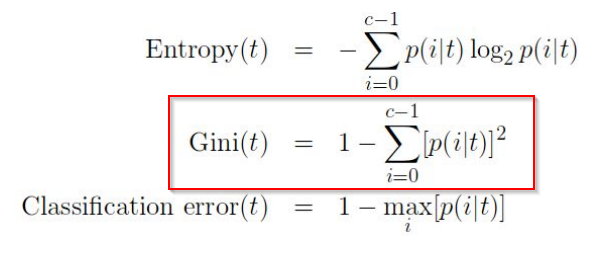


In [ ]:
tree_view = DecisionTreeClassifier(criterion='gini',random_state=0, max_depth=4)

# .fit é o comando de treinamento(lembre de fitness. o que treina)
model = tree_view.fit(X_train, y_train)
prediction_tree_train = model.predict(X_train)
accuracy = accuracy_score(y_train, prediction_tree_train)
print('Valor Acuracia: ',accuracy)

# -------- Decision Tree Test --------


In [ ]:
tree_view_test = DecisionTreeClassifier(criterion='gini',random_state=0, max_depth=4)

prediction_tree_test = model.predict(X_test)
accuracy = accuracy_score(y_test, prediction_tree_test)
print('Valor Acuracia: ',accuracy)

In [ ]:
nome_features = X_test.columns

plt.figure(figsize=(24,11))

plt.title('teste')
tree.plot_tree(model, label=None, node_ids=True, rounded=True, fontsize=9, feature_names=nome_features, filled=True, class_names=['0','1'], proportion=True)
# plt.savefig('decision_tree.png', format='png')
plt.show()

# -------- Randon Forest Train --------

O algoritmo Random Forest é um tipo de ensemble learning, método que gera muitos classificadores e combina o seu resultado.

No caso do Random Forest, ele gera vários decision trees, cada um com suas particularidades e combinada o resultado da classificação de todos eles. Essa combinação de modelos, torna ele um algoritmo muito mais poderoso do que o Decision Tree.

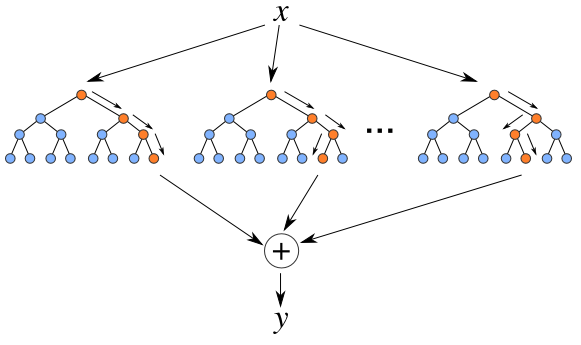


In [ ]:
SEED=42
randon_forest = RandomForestClassifier(max_depth= 5, random_state = SEED)

In [ ]:
model_rando_forest = randon_forest.fit(X_train, y_train)
prediction_rf_train = model_rando_forest.predict(X_train)

accuracy = accuracy_score(y_train, prediction_rf_train)
print('Valor Acuracia: ',accuracy)

# -------- Randon Rorest Test --------

In [ ]:
prediction_rf = model_rando_forest.predict(X_test)

accuracy = accuracy_score(y_test, prediction_rf)
print('Valor Acuracia: ',accuracy)

# -------- Logistic Regression Train --------

Regressão logística pode ser definido como uma técnica estatística que busca produzir (usando um conjunto de observações) um modelo que possibilita predizer os valores tomados por uma variável categórica. 

In [ ]:
logistic_regression = LogisticRegression(max_iter = 1000 ,random_state = 0)
model_logistic_regression = logistic_regression.fit(X_train, y_train)
prediction_lr_train = model_logistic_regression.predict(X_train)

In [ ]:
y_accuracy = accuracy_score(y_train, prediction_lr_train)
print("Acurácia:", y_accuracy)

# -------- Logistic Regression Test --------

In [ ]:
prediction_lr_test = model_logistic_regression.predict(X_test)
y_accuracy = accuracy_score(y_test, prediction_lr_test)
print("Acurácia:", y_accuracy)

# -------- GaussianNB Train --------

In [ ]:
gnb = GaussianNB()
modelo_gaucianNB = gnb.fit(X_train, y_train)

preds_naivebaies_train = modelo_gaucianNB.predict(X_train)

In [ ]:
y_accuracy = accuracy_score(y_train, preds_naivebaies_train)
print("Acurácia:", y_accuracy)

# -------- GaussianNB Train --------

In [ ]:
reds_naivebaies_teste = modelo_gaucianNB.predict(X_test)
y_accuracy = accuracy_score(y_test, reds_naivebaies_teste)
print("Acurácia:", y_accuracy)

## Criação de objeto de classificadores

In [ ]:
classifiers = {'Arvore': DecisionTreeClassifier(random_state=0, max_depth=4),
               'Random Forest': RandomForestClassifier(max_depth= 5, random_state = SEED),
               'Naive Bayes': GaussianNB(),
               'Regressão Logistica': LogisticRegression(max_iter = 1000 ,random_state = 0),
              }

In [ ]:
for c in X_train.columns:
    if X_train[c].dtype == "object":
        X_train[c] = X_train[c].astype('category')
        X_train[c] = X_train[c].cat.codes

In [ ]:
for clf in classifiers.items():
    clf[1].fit(X_train, y_train)
    preds = clf[1].predict(X_test)
    score = accuracy_score(preds, y_test)
    print(f'\n------{clf[0]}------')
    print("Acurácia:",accuracy_score(y_test, preds))
    print("Precisão:",precision_score(y_test, preds))
    print("Recall:",recall_score(y_test, preds))
    print("F1:",f1_score(y_test, preds))

In [ ]:
preds = []
clf_trained = []
names=[]
for clf in classifiers.items():
    clf_atual = clf[1].fit(X_train, y_train)
    clf_trained.append(clf_atual)

    pred_atual=clf[1].predict(X_test)
    preds.append(pred_atual)
    names.append(clf[0])
    
    print(precision_recall_fscore_support(y_test, pred_atual, average='macro'))

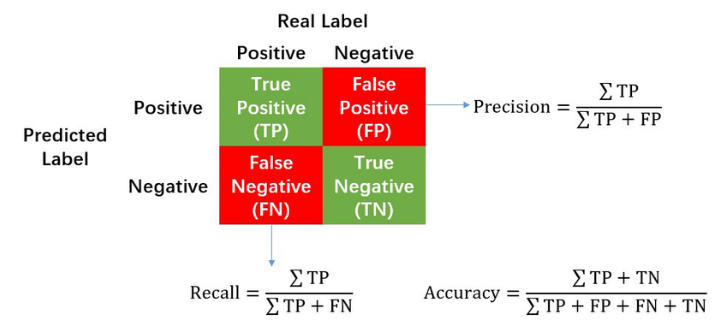

In [ ]:
fig, axs =  plt.subplots(2, 2, figsize=(15, 10))
position = [axs[0,0],axs[0,1],axs[1,0],axs[1,1]]

for i in range(len(classifiers)):
    cm = confusion_matrix(y_test, preds[i], labels=clf_trained[i].classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Terá", "Não terá"])
    position[i].set_title(names[i])
    disp.plot(ax=position[i])
    
plt.show()

# Cross-Validation

A escolha da validação cruzada correta depende do conjunto de dados com o qual você está lidando, e a escolha da validação cruzada em um conjunto de dados pode ou não se aplicar a outros conjuntos de dados. No entanto, existem alguns tipos de técnicas de validação cruzada que são as mais populares e amplamente utilizadas. Esses incluem:

- validação cruzada k-fold
- validação cruzada estratificada em k-fold A validação cruzada é dividir os dados de treinamento em algumas partes. Treinamos o modelo em algumas dessas peças e testamos nas demais

http://carlosbaia.com/2016/12/24/decision-tree-e-random-forest/#:~:text=O%20algoritmo%20Random%20Forest%20%C3%A9,da%20classifica%C3%A7%C3%A3o%20de%20todos%20eles.

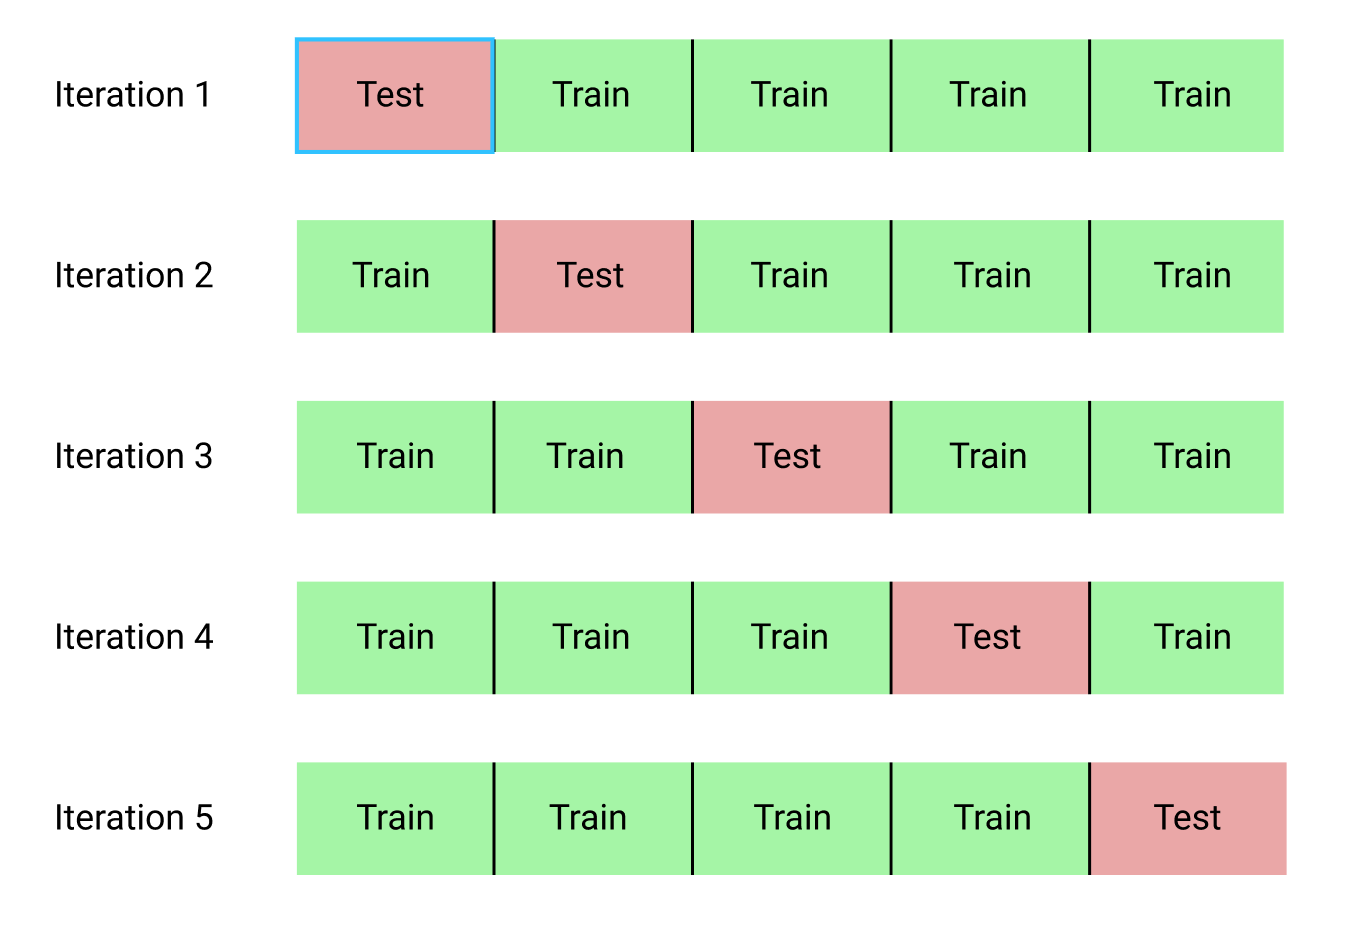



In [ ]:
for i in classifiers.items():
    scores_dt = cross_val_score(i[1], X_test, y_test, scoring='accuracy', cv=5)
    print(f'\n---- {i[0]} ----')
    print(scores_dt)
    

In [ ]:
ax = plt.gca()
for i in range(len(classifiers)):
    clf = classifiers[names[i]]      
    rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, alpha=0.7)
plt.show()
    
clf2 = classifiers['Random Forest']
svc_disp = RocCurveDisplay.from_estimator(clf2, X_test, y_test)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()